<a href="https://colab.research.google.com/github/Jesusmaing/jobsRecommender/blob/master/recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importamos las librerias necesarias

In [1]:
import pandas as pd #cargar los daots
import numpy as np #operaciones matriciales
import matplotlib.pyplot as plt #graficar
import nltk  as nltk#libreria de procesamiento de lenguaje natural
import requests
import io
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import joblib

## Leemos el csv que está localizado en el repositorio de GitHub y lo cargamos en un pandas dataframe para tratarlo como una datatable

In [2]:

jobs = pd.read_csv('https://raw.githubusercontent.com/Jesusmaing/jobsRecommender/master/jobskills.csv',encoding='utf-8')
jobs

,job,skills,uniq_id
0,Information Security Engineer,"linux, network monitoring, incident response, ...",8aec88cba08d53da65ab99cf20f6f9d9
1,Business Solutions Architect,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
2,DevOps Engineer,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7
3,SAP FICO Architect,"FICO, AR, AP, Asset Management, HAHA",e0ac9d926dda5e95162ef05adea7318c
4,Network Engineer,"Cisco, DNS, HTTP, Networking, Network Engineer...",e7e326053c586bd94e59f1fd74de4a1b
...,...,...,...
21983,Web Designer,"UI/UX mobile apps, interaction design, digital...",86e27ce6b7e631e55d69d142c7d43df2
21984,Senior Front End Web Developer - Full Time at ...,"JavaScript, HTML5, CSS3, Bootstrap, AJAX, Reac...",4287c7ee3317ccf1edd76e238cf8e584
21985,QA Analyst,"SDLC, ALM, SQL, T-SQL, RedGate, Team Foundatio...",d7512f0181d69f83f96db38cd77a4d08
21986,Tech Lead-Full Stack,"Python, Ruby, Go, Clojure, Java, NoSQL-Databas...",ec375268b494b3bcbed1635d64226112


In [3]:
#Separamos en una lista de valores los skills
jobs['skills'] = jobs['skills'].str.split(',')
jobs['job'] = jobs['job'].str.split(',')

In [6]:
jobs

,job,skills,uniq_id
0,[Information Security Engineer],"[linux, network monitoring, incident respons...",8aec88cba08d53da65ab99cf20f6f9d9
1,[Business Solutions Architect],"[Enterprise Solutions Architecture, business ...",46baa1f69ac07779274bcd90b85d9a72
2,[DevOps Engineer],"[Configuration Management, Developer, Linux,...",45efa1f6bc65acc32bbbb953a1ed13b7
3,[SAP FICO Architect],"[FICO, AR, AP, Asset Management, HAHA]",e0ac9d926dda5e95162ef05adea7318c
4,[Network Engineer],"[Cisco, DNS, HTTP, Networking, Network Eng...",e7e326053c586bd94e59f1fd74de4a1b
...,...,...,...
21983,[Web Designer],"[UI/UX mobile apps, interaction design, digi...",86e27ce6b7e631e55d69d142c7d43df2
21984,[Senior Front End Web Developer - Full Time at...,"[JavaScript, HTML5, CSS3, Bootstrap, AJAX,...",4287c7ee3317ccf1edd76e238cf8e584
21985,[QA Analyst],"[SDLC, ALM, SQL, T-SQL, RedGate, Team Fou...",d7512f0181d69f83f96db38cd77a4d08
21986,[Tech Lead-Full Stack],"[Python, Ruby, Go, Clojure, Java, NoSQL-D...",ec375268b494b3bcbed1635d64226112


### 1. Quitamos espacios del inicio y del final 
### 2. Quitamos todos aquellos trabajos que no tiene skills con dropna y si la lista está vacía se va a borrar
### 3. Al tener todos los datos normalizados, en minusculas y sin espacios, se procede a borrar todos los duplicados

In [4]:
#Limpiamos los datos, pasamos a minúsculas, quitamos espacios al inicio y final y quitamos duplicados if skill is list and not float
#DELETE EMPTY SKILLS
jobs['skills'] = jobs['skills'].apply(lambda x: [i.lower().strip() for i in x] if type(x) is list else x)
jobs.dropna()
#delete if job skills list and non float is empty or nan 
jobs = jobs[jobs['skills'].map(lambda d: len(d) > 0 if type(d) is list else False)]
#remove duplicates
jobs['skills'] = jobs['skills'].apply(lambda x: list(dict.fromkeys(x) ) if type(x) is list else x)


C:\Users\marti\AppData\Local\Temp\ipykernel_32552\87722813.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs['skills'] = jobs['skills'].apply(lambda x: list(dict.fromkeys(x) ) if type(x) is list else x)


In [8]:
jobs

,job,skills,uniq_id
0,[Information Security Engineer],"[linux, network monitoring, incident response,...",8aec88cba08d53da65ab99cf20f6f9d9
1,[Business Solutions Architect],"[enterprise solutions architecture, business i...",46baa1f69ac07779274bcd90b85d9a72
2,[DevOps Engineer],"[configuration management, developer, linux, m...",45efa1f6bc65acc32bbbb953a1ed13b7
3,[SAP FICO Architect],"[fico, ar, ap, asset management, haha]",e0ac9d926dda5e95162ef05adea7318c
4,[Network Engineer],"[cisco, dns, http, networking, network enginee...",e7e326053c586bd94e59f1fd74de4a1b
...,...,...,...
21983,[Web Designer],"[ui/ux mobile apps, interaction design, digita...",86e27ce6b7e631e55d69d142c7d43df2
21984,[Senior Front End Web Developer - Full Time at...,"[javascript, html5, css3, bootstrap, ajax, rea...",4287c7ee3317ccf1edd76e238cf8e584
21985,[QA Analyst],"[sdlc, alm, sql, t-sql, redgate, team foundati...",d7512f0181d69f83f96db38cd77a4d08
21986,[Tech Lead-Full Stack],"[python, ruby, go, clojure, java, nosql-databa...",ec375268b494b3bcbed1635d64226112


#Creamos una lista de frecuencias.
## Esto se hará para gráficar  el número de veces que se repiten ciertos skills para ver cuales son los más demandados en el dataset que seleccionamos.

In [21]:
vocabulary1 = nltk.FreqDist()
for skill in jobs['skills']:
    if type(skill) is list:
        # delete empty skills
        if len(skill) > 0:
            vocabulary1.update(skill)
    


Obtenemos el número de palabra más repetidas y lo graficamos

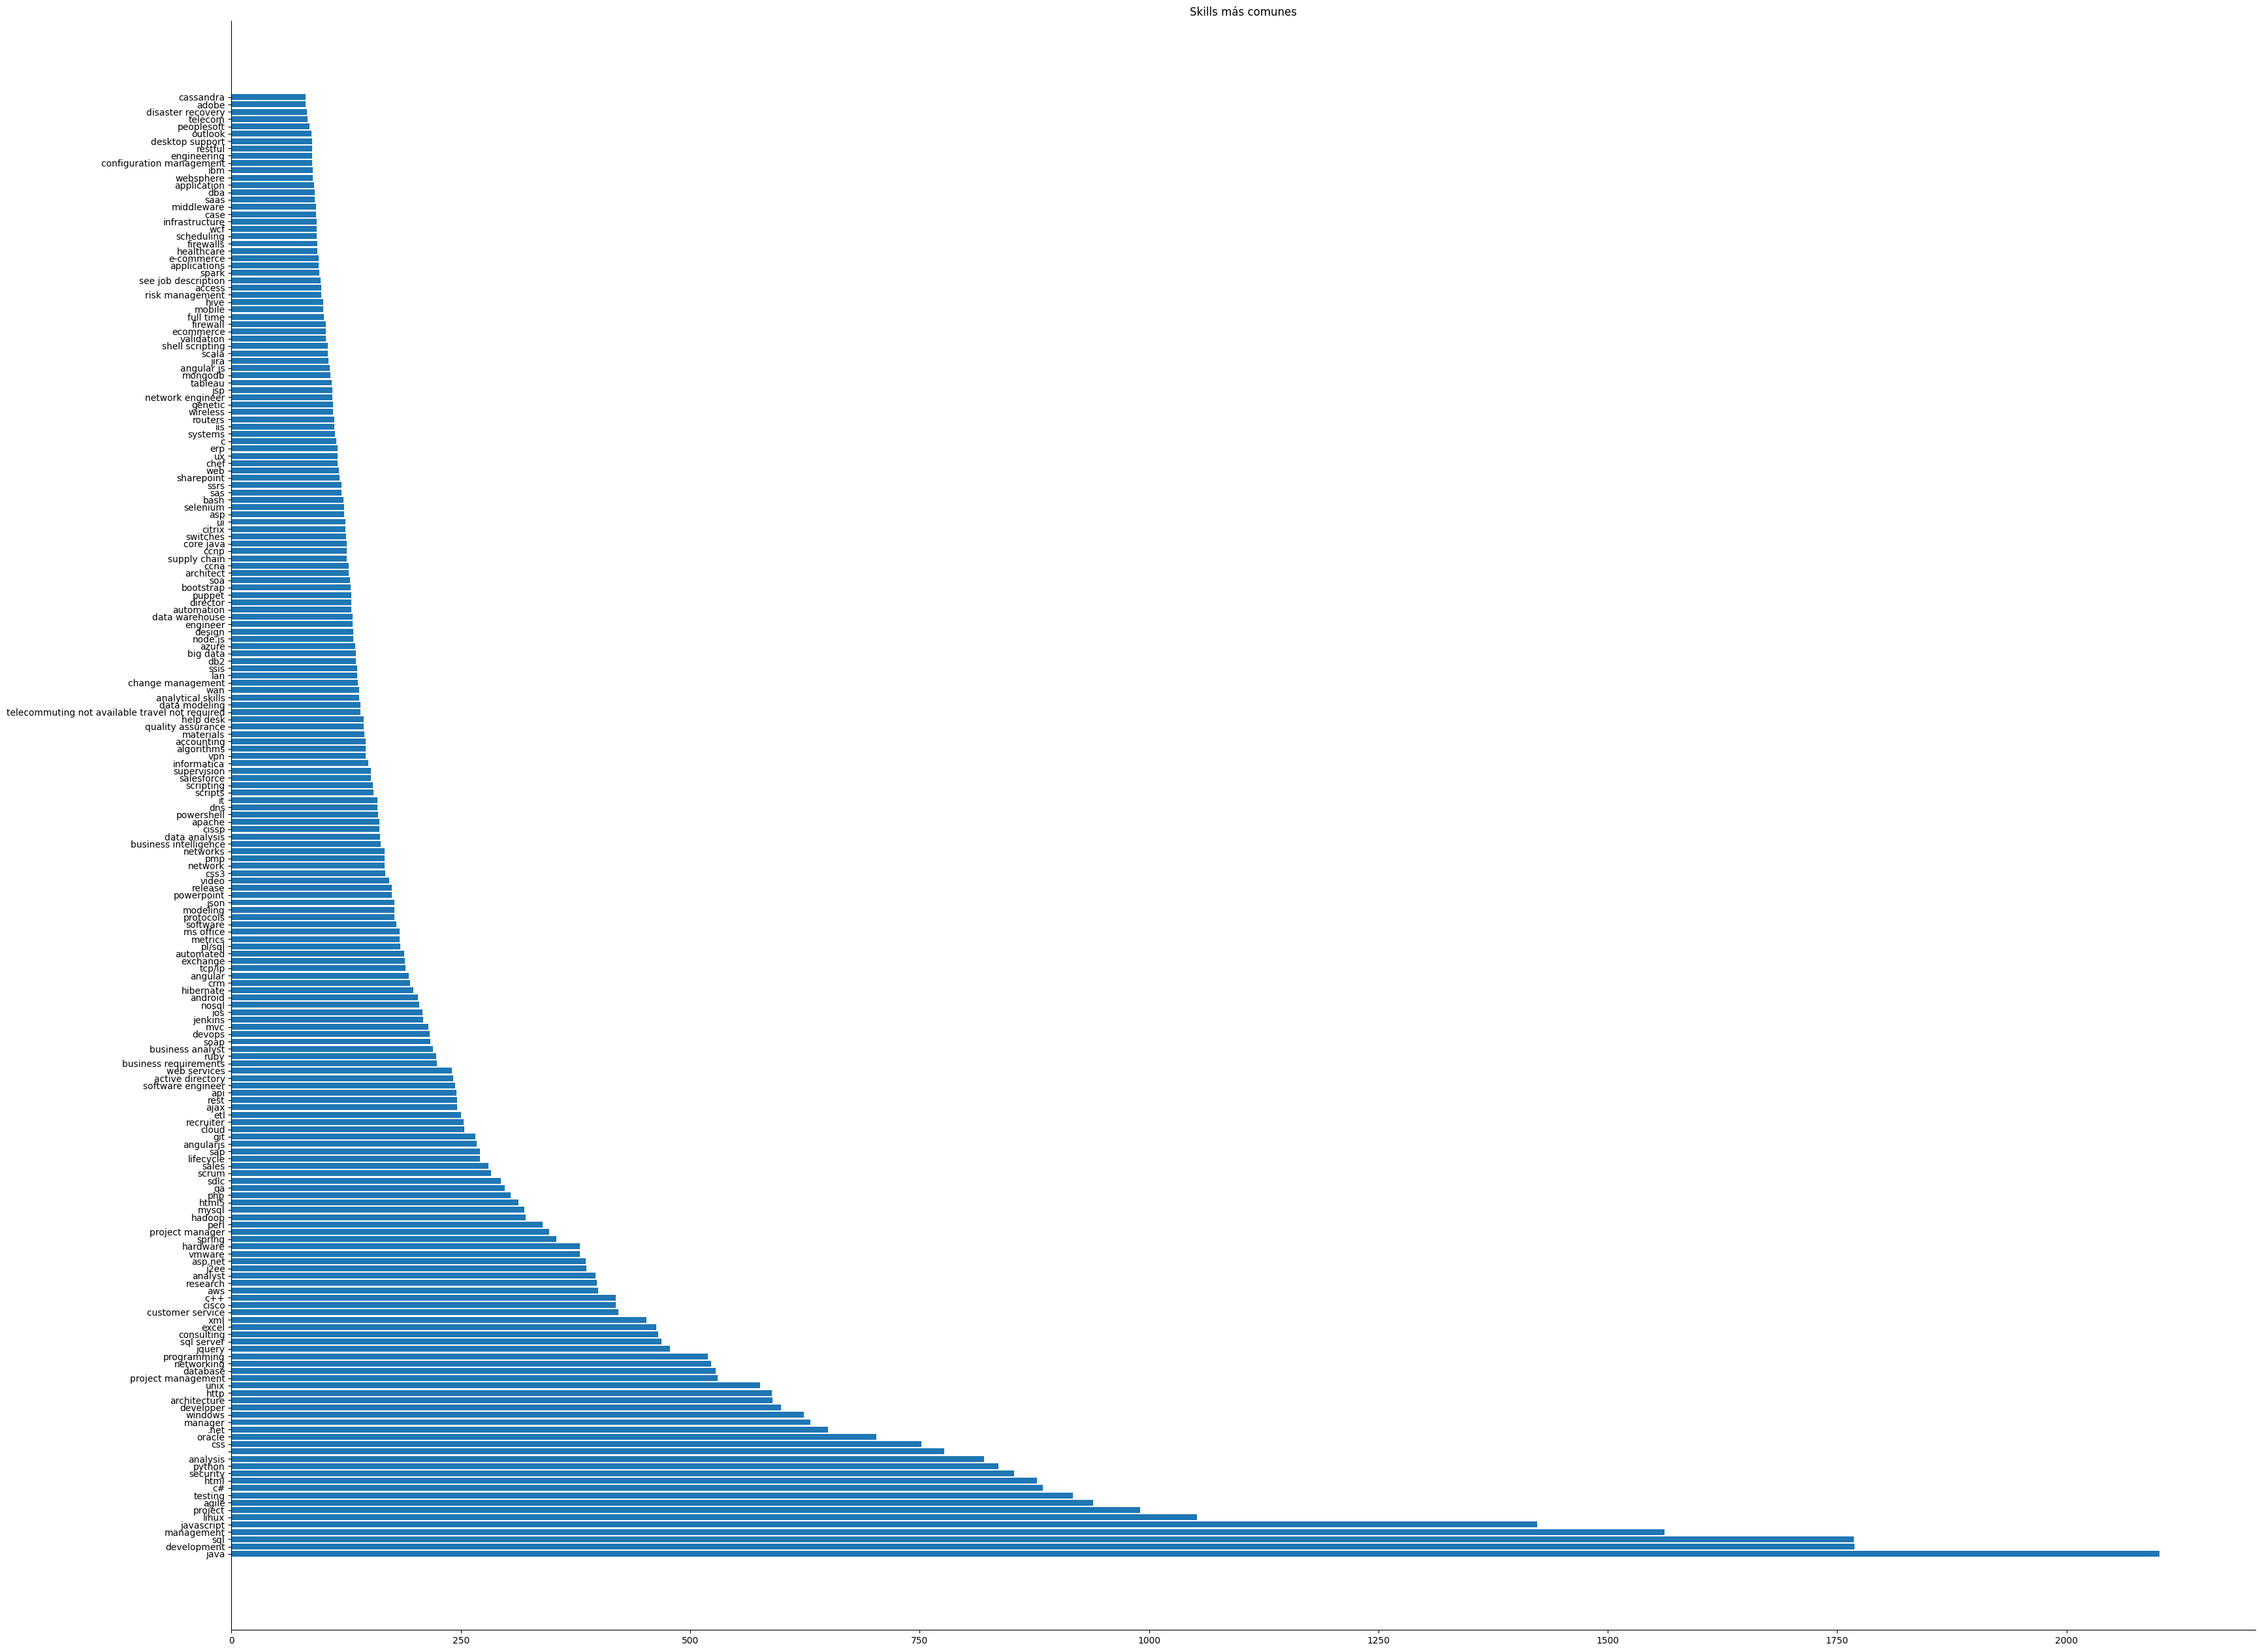

In [7]:
#plot all skills as histogram
fig , ax = plt.subplots(figsize=(40,32))
plt.barh([x[0] for x in vocabulary1.most_common(200)],[x[1] for x in vocabulary1.most_common(200)], label='skills')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('# Skills')
plt.title('Skills más comunes')
plt.show()


In [12]:
#Creamos una instancia para vectorizar los skills
vectorizer = TfidfVectorizer()
# Pasamos la lista de Strings a un solo string con espacios para transformar los datos
tfidf_skills = vectorizer.fit_transform(jobs['skills'].apply(lambda x: ' '.join(x) if type(x) is list else x))
print(vectorizer)



TfidfVectorizer()


In [6]:
joblib.dump(vectorizer, "./vectorizer.pkl")


['./vectorizer.pkl']

In [19]:
joblib.dump(tfidf_skills, "./tfidf_skills.pkl")


['./tfidf_skills.pkl']

In [20]:
importedvectorizer = joblib.load("./vectorizer.pkl")
importedtfidf_skills = joblib.load("./tfidf_skills.pkl")


<bound method CountVectorizer.get_feature_names of TfidfVectorizer()>


In [23]:
def recommender(listOfSkills):      
    skills = listOfSkills
    #to lower case and remove spaces
    skills = [i.lower().strip() for i in skills]
    #remove duplicates
    skills = list(dict.fromkeys(skills))
    #all list of single string
    skills = ' '.join(skills)
    #vectorize the skills
    skills = importedvectorizer.transform([skills])
    
    #se calcula la similitud del coseno de la lista de skills dadas con el resto de las listas de skills
    #con eso se va a obtener un vector de similitud con cada uno de los trabajos de la lista de trabajos    
    similarity_list = cosine_similarity(skills,importedtfidf_skills)
    
    #sort the list of similarity in order desc and get the index
    #es una lista sorteada de distancias de menor a mayor, nosotros necesitamos la mayor similitud, por eso se hace sort descendentemente 
    #para obtener los indices de la mayor similitud
    sorted_indexes = np.argsort(similarity_list[0])[::-1]
    
    #get 10 recommendations jobs
    return jobs['job'].iloc[sorted_indexes].values[0:20]

In [25]:
print(recommender(['Data Science', 'R', 'Javascript']))

[list(['Data Scientist']) list(['Data Science Developer'])
 list(['Data Engineer - Cyber Security'])
 list(['Algorithms Engineer - Predictive Analytics - RELO Offered'])
 list(['Senior Data Software Engineer - Bio/Pharma - up to 150K'])
 list(['Data Engineer']) list(['Data Scientist'])
 list(['Technical Consultant-Data Sciences'])
 list(['Litigation Support Technical Specialist'])
 list(['Senior Data Engineer']) list(['Data Lead'])
 list(['Digital Strategist'])
 list(['Software Engineer - Jr. to Mid (Web Services)'])
 list(['Sr and Jr Front End Positions - w StartUp'])
 list(['Creative Technologist - Elite Swat Team @ Financial Services company'])
 list(['JavaScript Developer']) list(['Software Engineer'])
 list(['Javascript Engineer - new Adtech product 160k'])
 list(['JavaScript Developer (Contract)'])
 list(['Front-end Engineer - fulltime with great benefits'])]
